In [551]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
import json

In [552]:
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

# Incidence

In [553]:
eps_prism = 5.5

payload = json.dumps({
    "ScenarioData": {
    "type": "Incident",
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 73,
        "rotationZ": 58,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]

x_axis = np.round(np.degrees(structure.incident_angle), 1)
frequency = structure.frequency

layer.profile = layer.profile['transmitted']

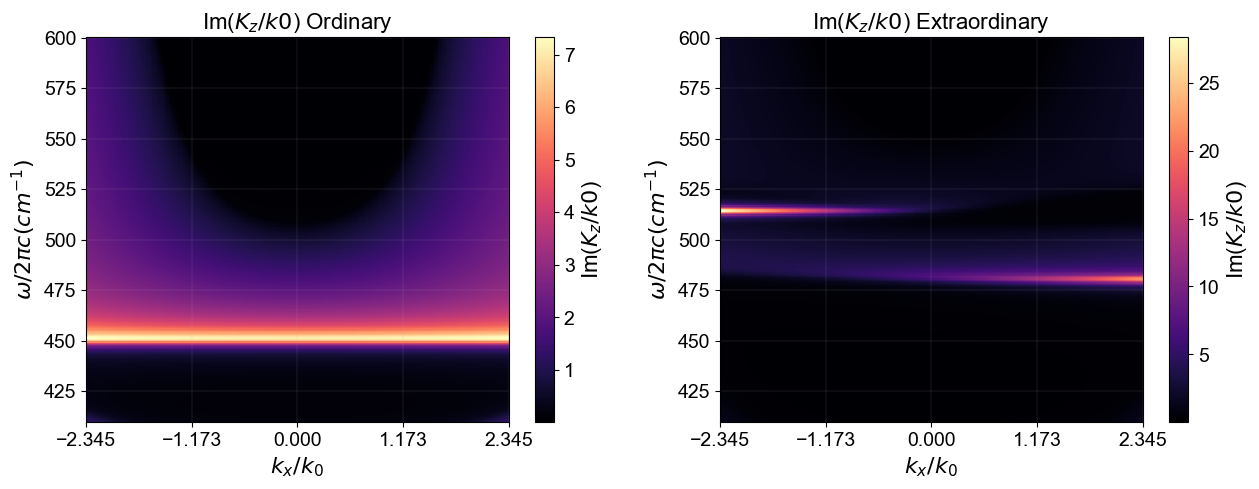

In [554]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

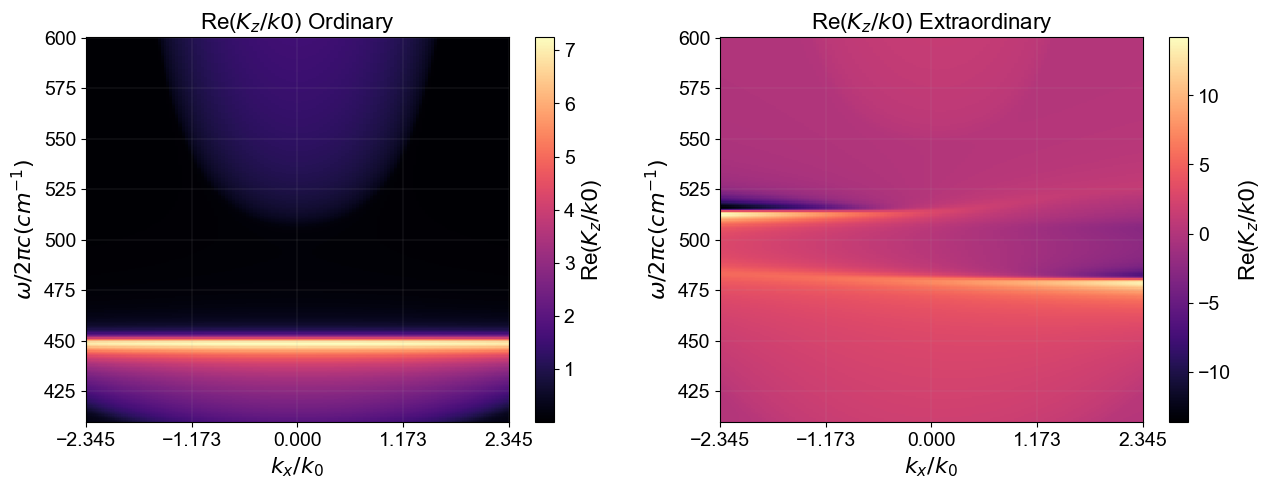

In [555]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

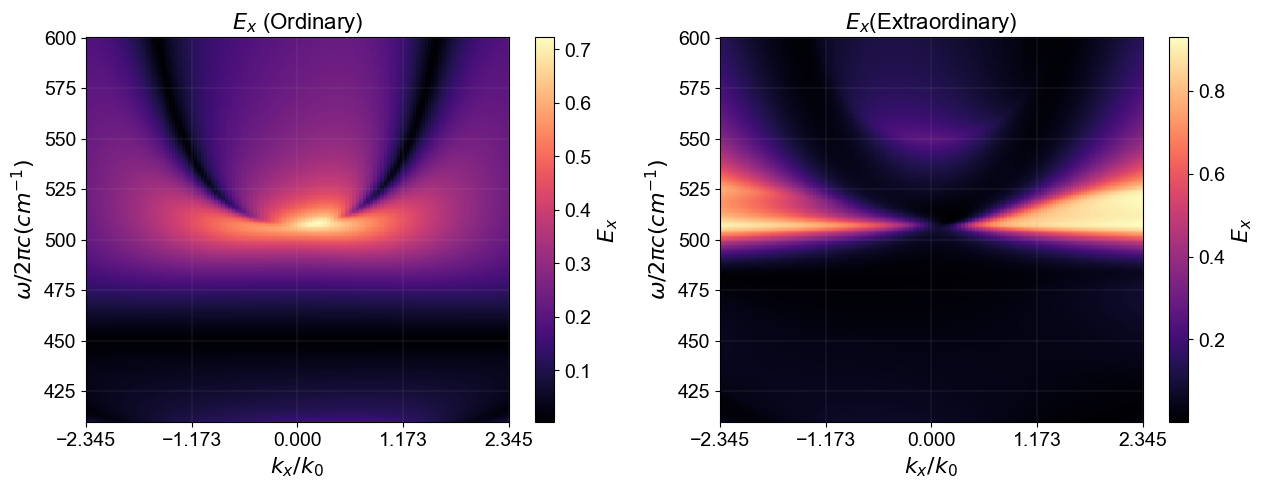

In [556]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ (Ordinary)')
axs[1].set_title(f'$E_x$(Extraordinary)')


plt.show()

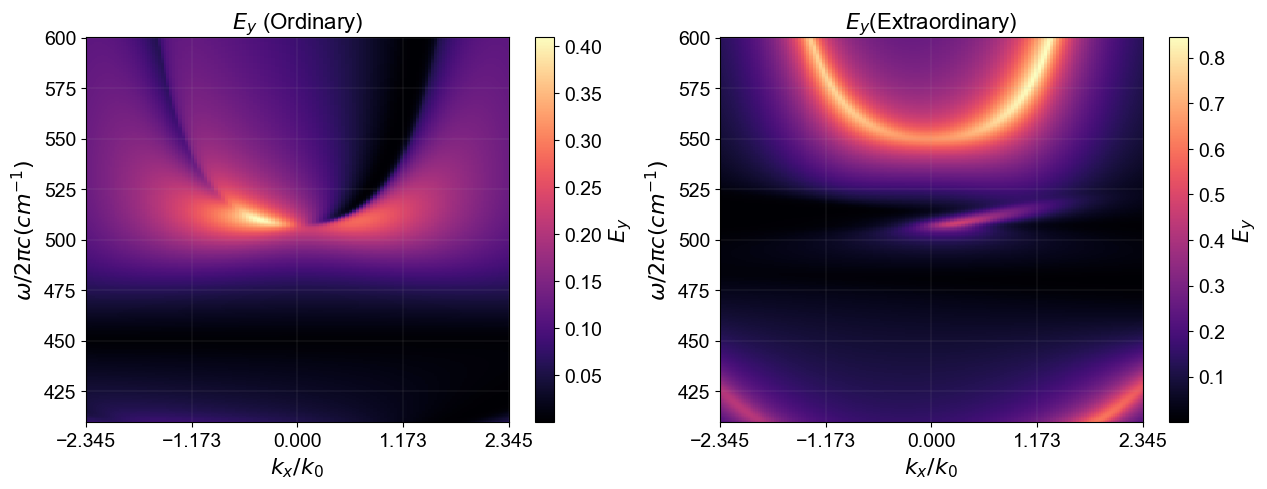

In [557]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ (Ordinary)')
axs[1].set_title(f'$E_y$(Extraordinary)')


plt.show()

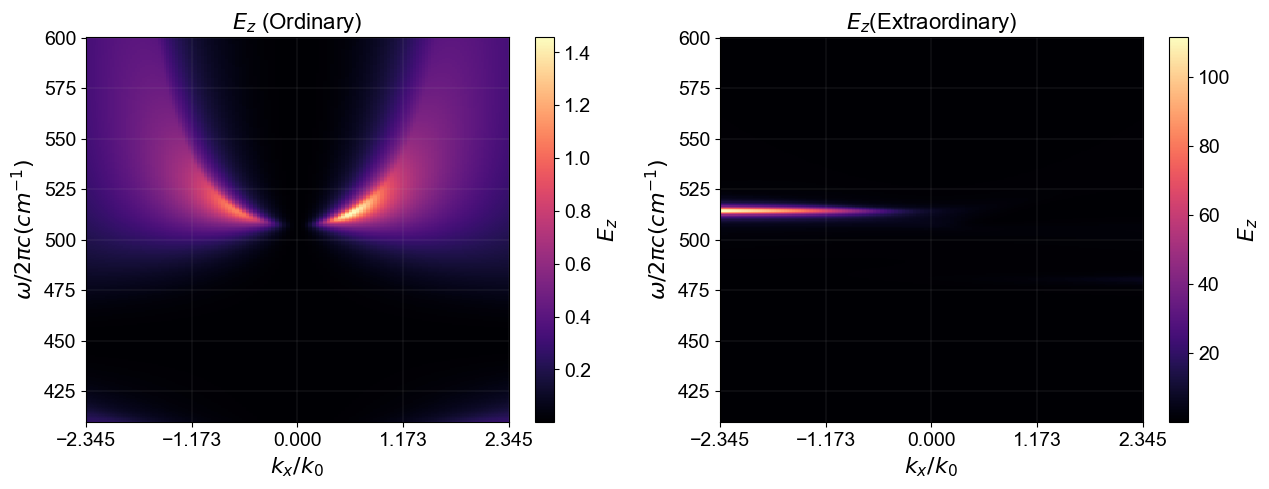

In [558]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ (Ordinary)')
axs[1].set_title(f'$E_z$(Extraordinary)')


plt.show()

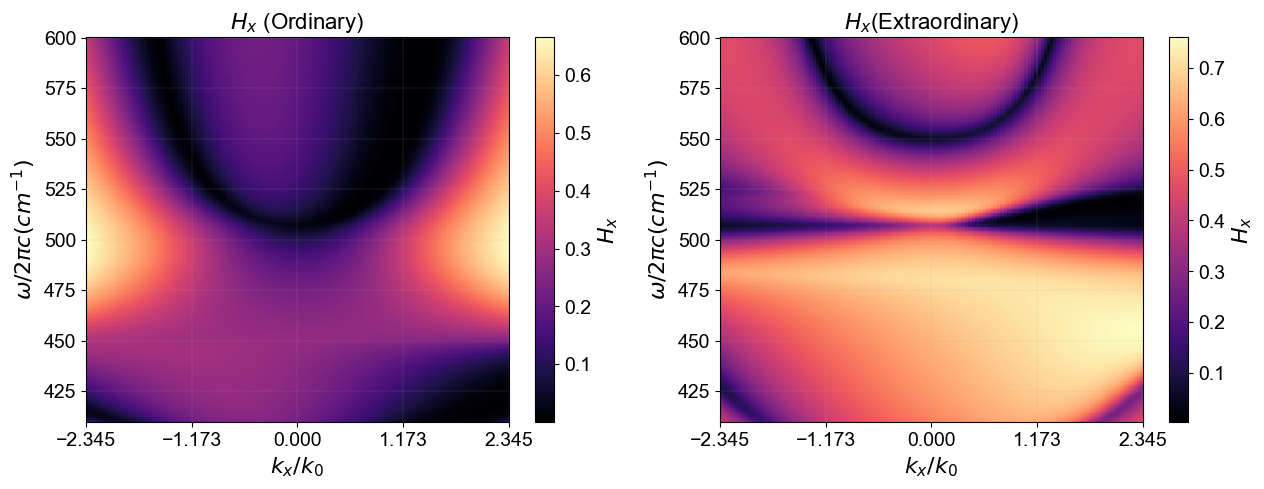

In [559]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ (Ordinary)')
axs[1].set_title(f'$H_x$(Extraordinary)')


plt.show()

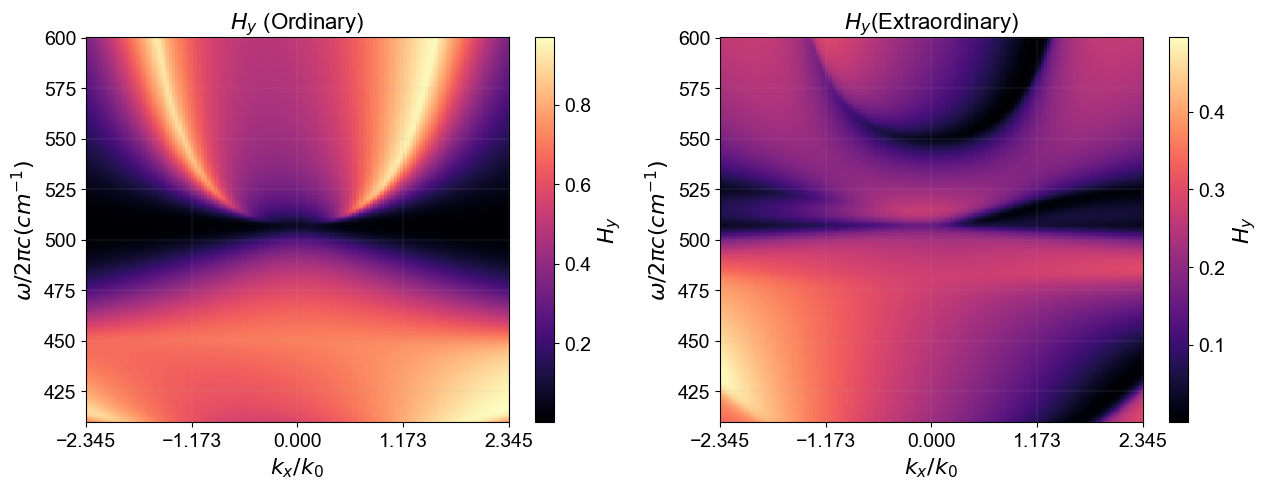

In [560]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ (Ordinary)')
axs[1].set_title(f'$H_y$(Extraordinary)')


plt.show()

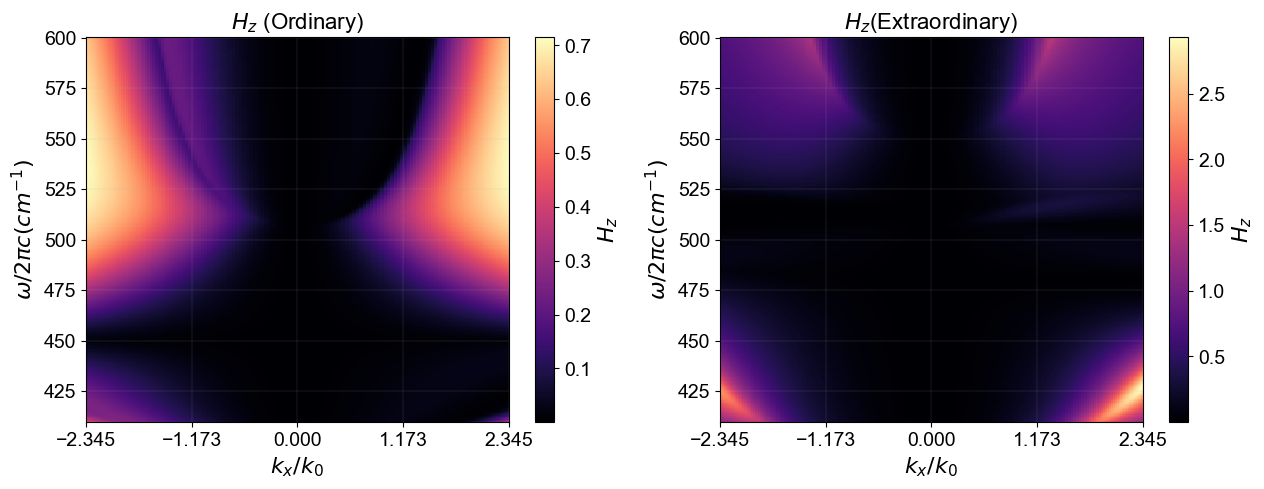

In [561]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ (Ordinary)')
axs[1].set_title(f'$H_z$(Extraordinary)')


plt.show()

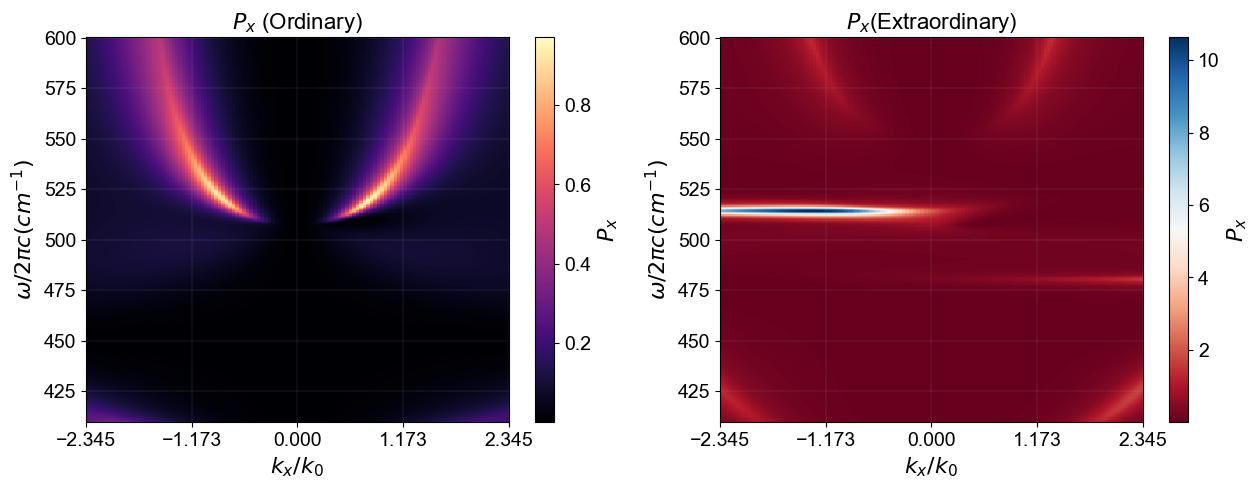

In [562]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ (Ordinary)')
axs[1].set_title(f'$P_x$(Extraordinary)')


plt.show()

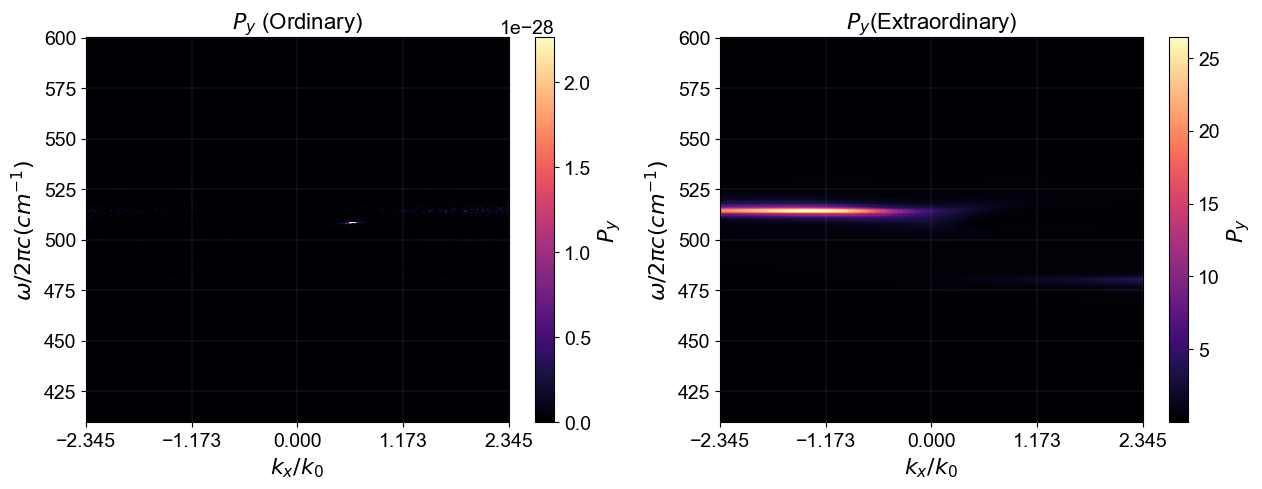

In [563]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ (Ordinary)')
axs[1].set_title(f'$P_y$(Extraordinary)')


plt.show()

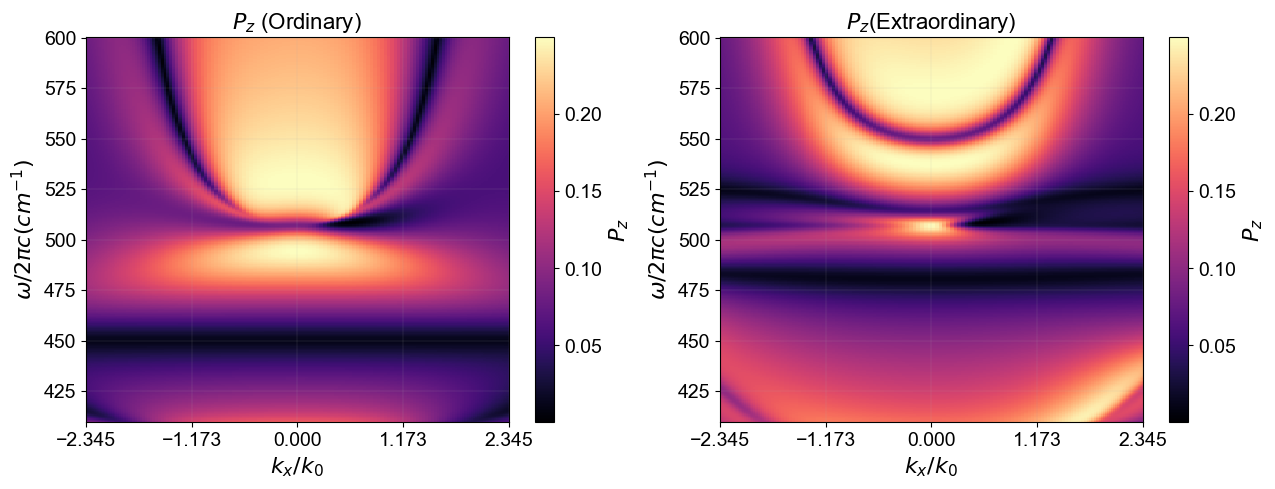

In [564]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ (Ordinary)')
axs[1].set_title(f'$P_z$(Extraordinary)')


plt.show()

# Azimuthal Rotation

In [565]:
payload = json.dumps({
    "ScenarioData": {
    "type": "Azimuthal",
    "incidentAngle": 45,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": 5.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Calcite",
        "rotationX": 0,
        "rotationY": 66.7,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [566]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]
layer.profile = layer.profile['transmitted']

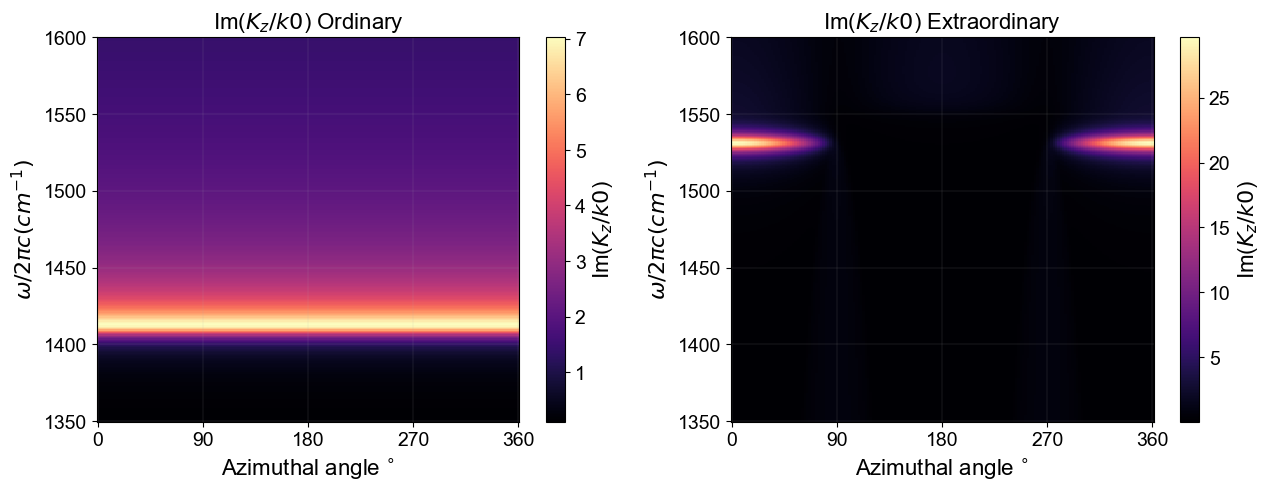

In [567]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

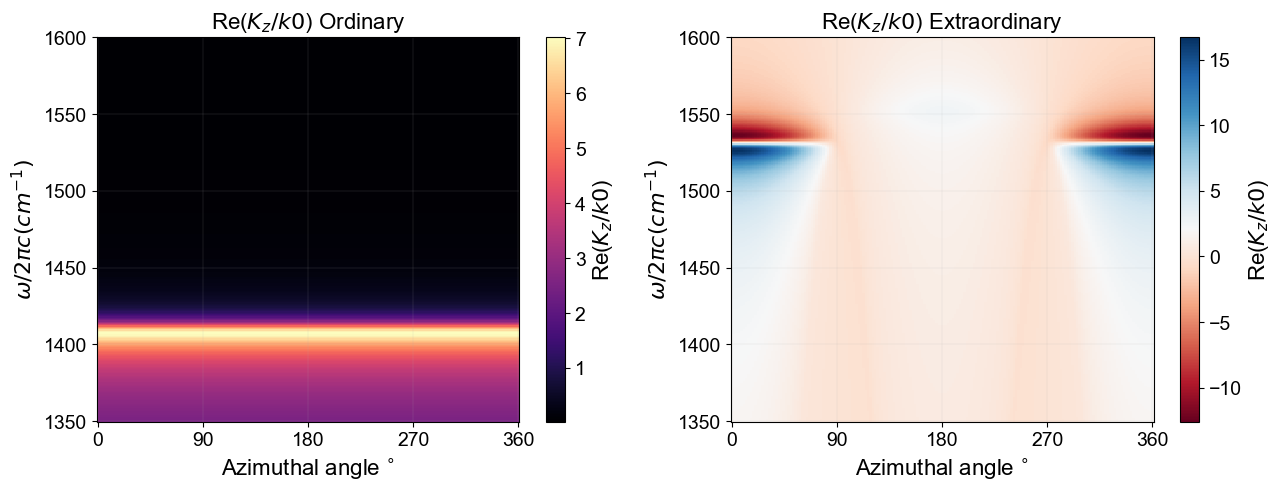

In [568]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

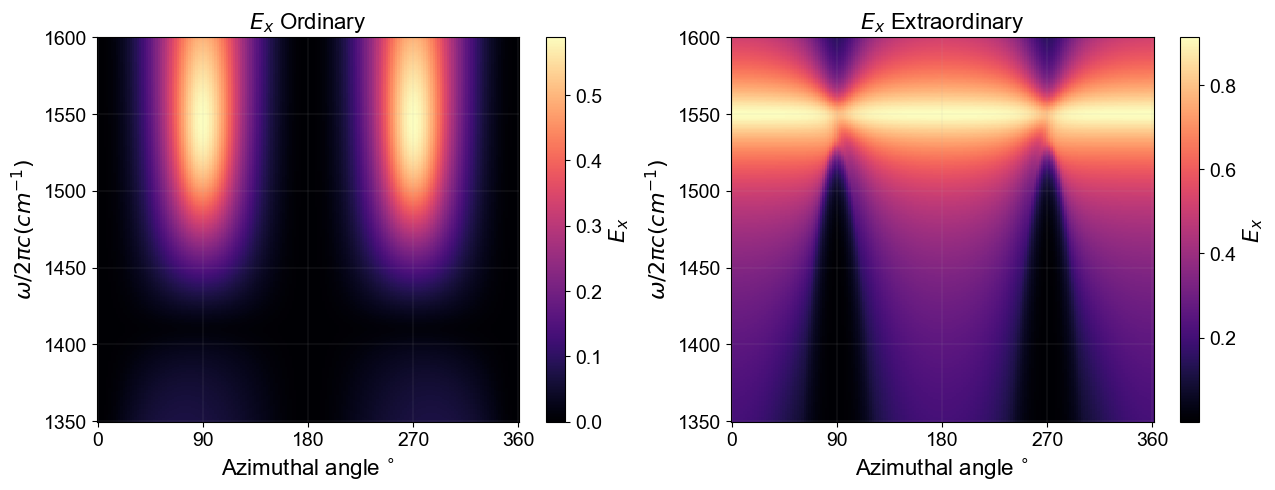

In [569]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ Ordinary')
axs[1].set_title(f'$E_x$ Extraordinary')


plt.show()

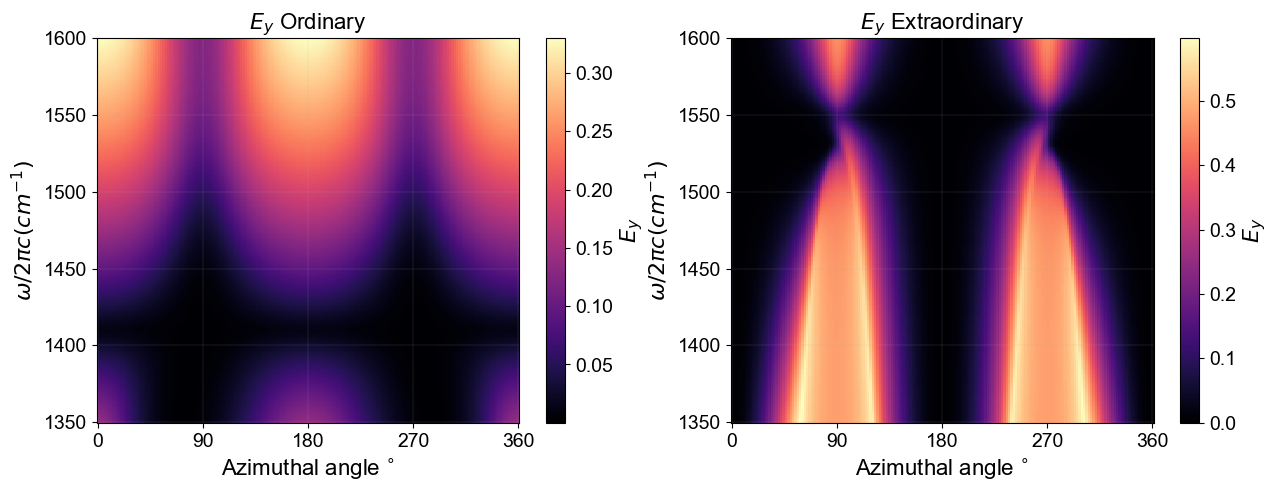

In [570]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ Ordinary')
axs[1].set_title(f'$E_y$ Extraordinary')


plt.show()

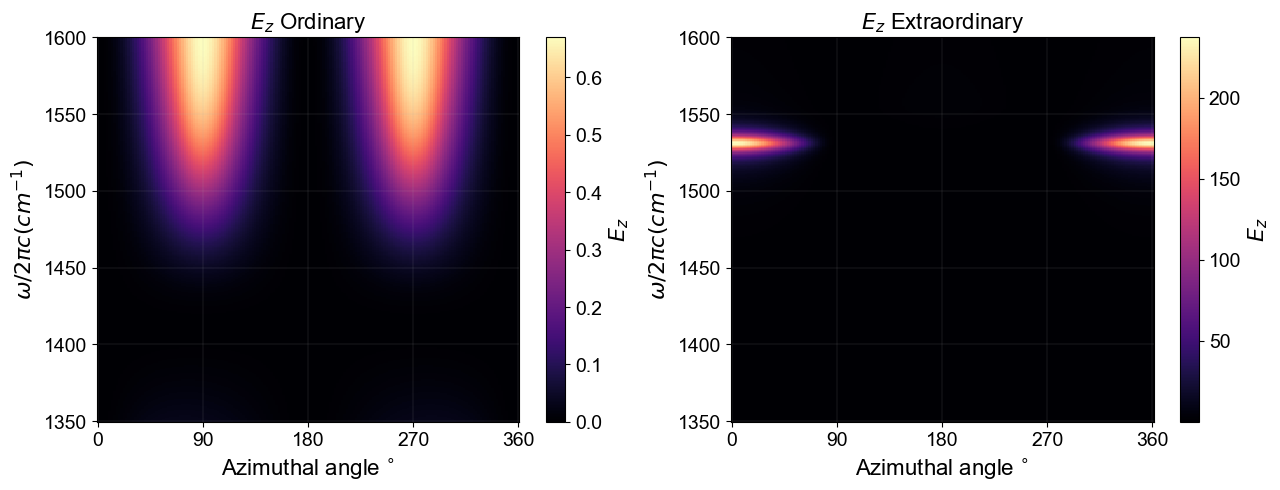

In [571]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ Ordinary')
axs[1].set_title(f'$E_z$ Extraordinary')


plt.show()

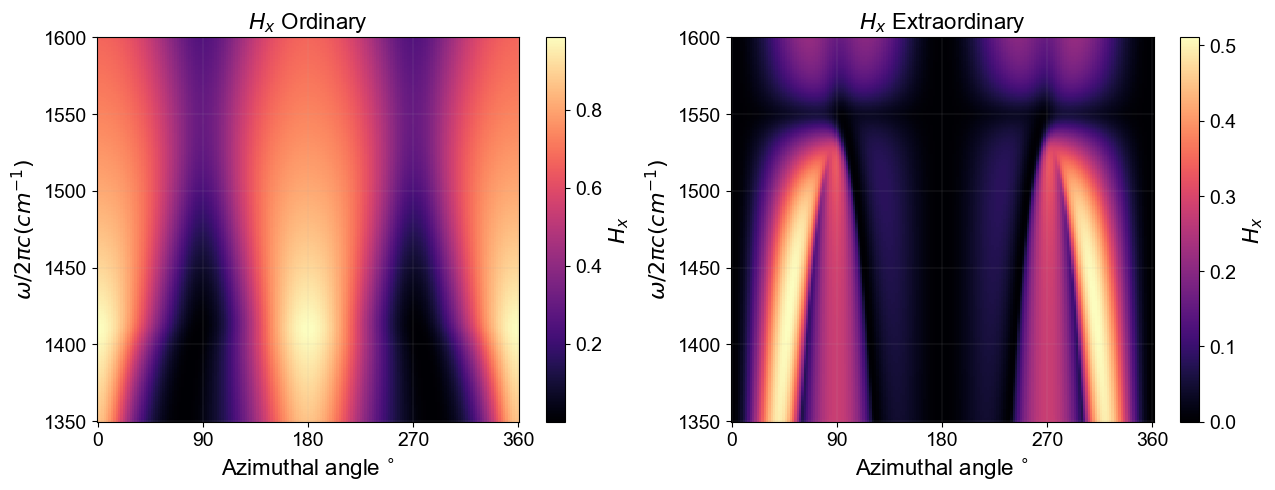

In [572]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ Ordinary')
axs[1].set_title(f'$H_x$ Extraordinary')


plt.show()

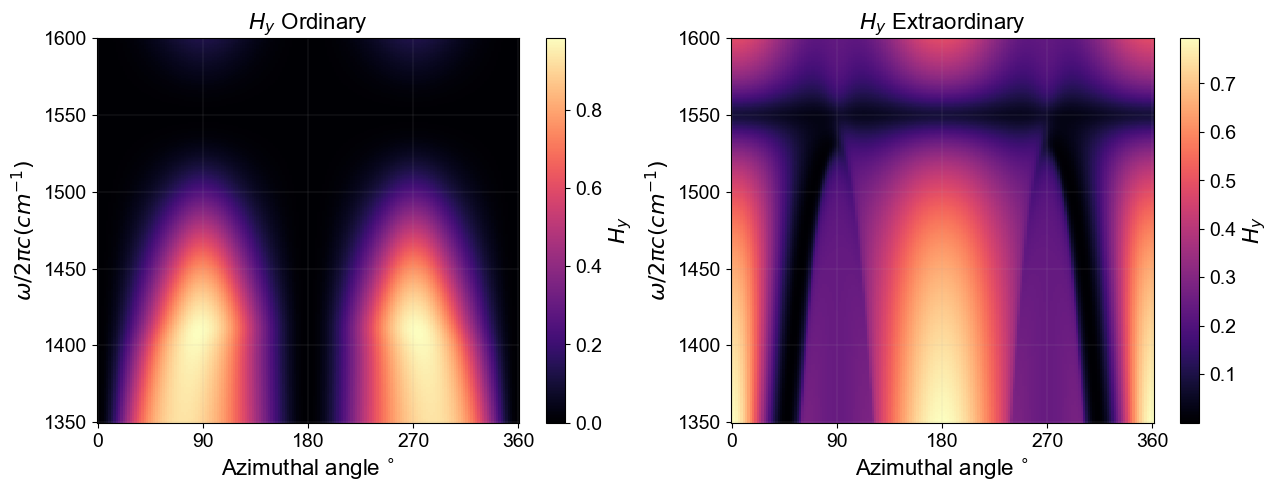

In [573]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ Ordinary')
axs[1].set_title(f'$H_y$ Extraordinary')


plt.show()

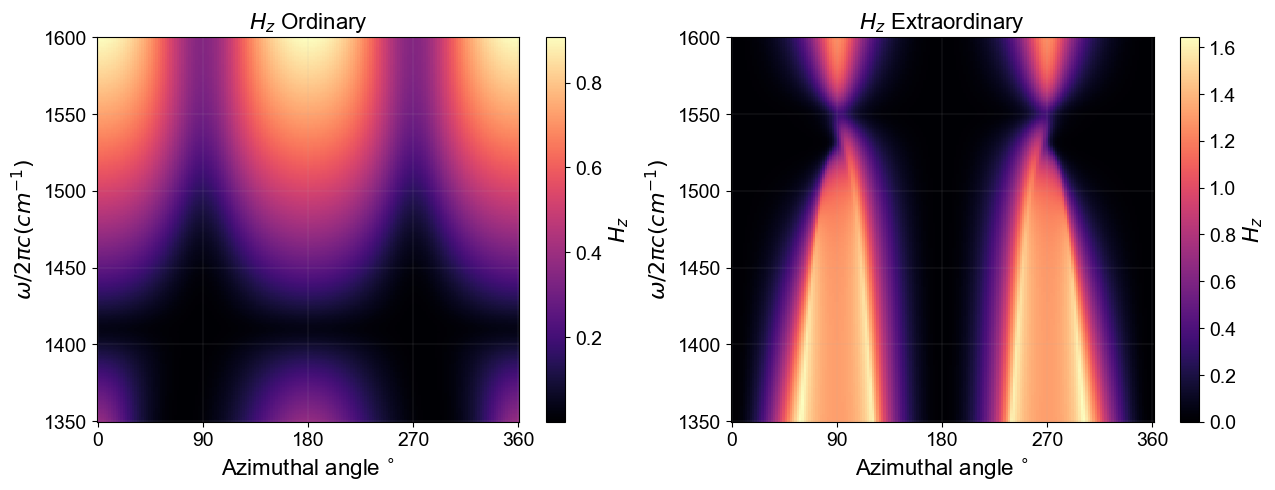

In [574]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ Ordinary')
axs[1].set_title(f'$H_z$ Extraordinary')


plt.show()

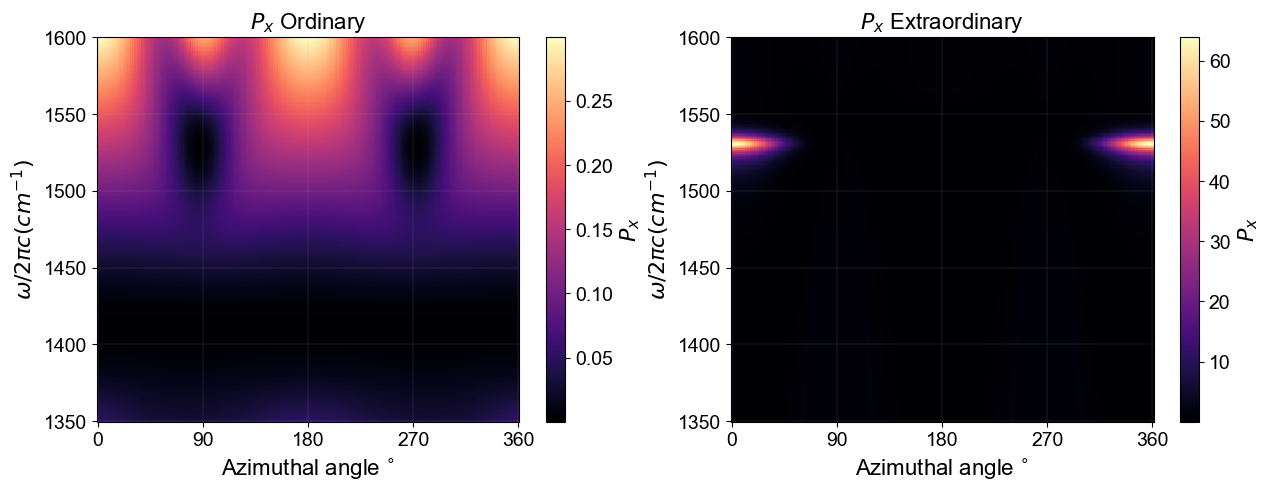

In [575]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ Ordinary')
axs[1].set_title(f'$P_x$ Extraordinary')


plt.show()

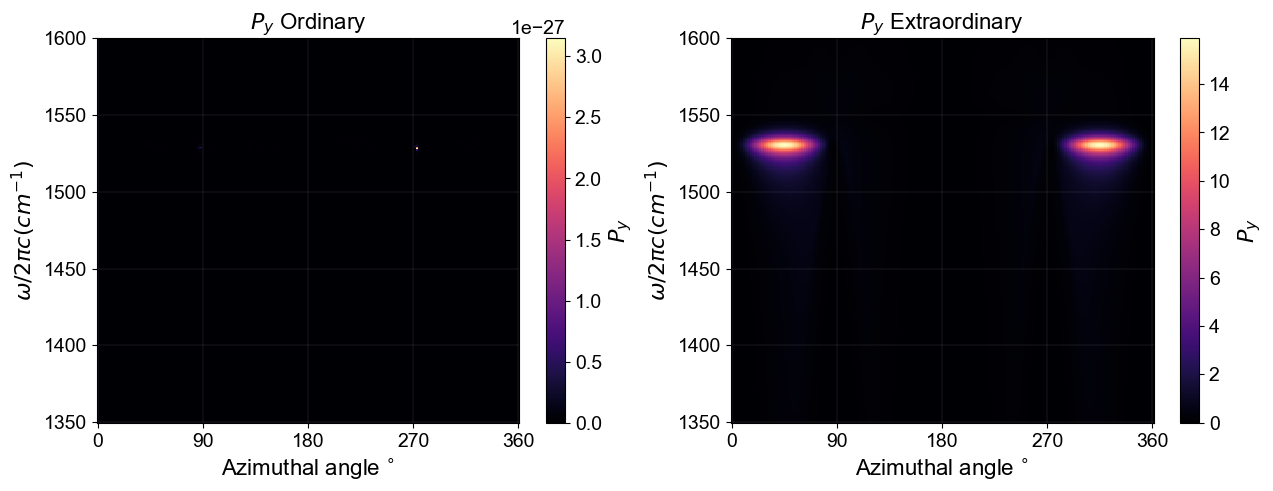

In [576]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ Ordinary')
axs[1].set_title(f'$P_y$ Extraordinary')


plt.show()

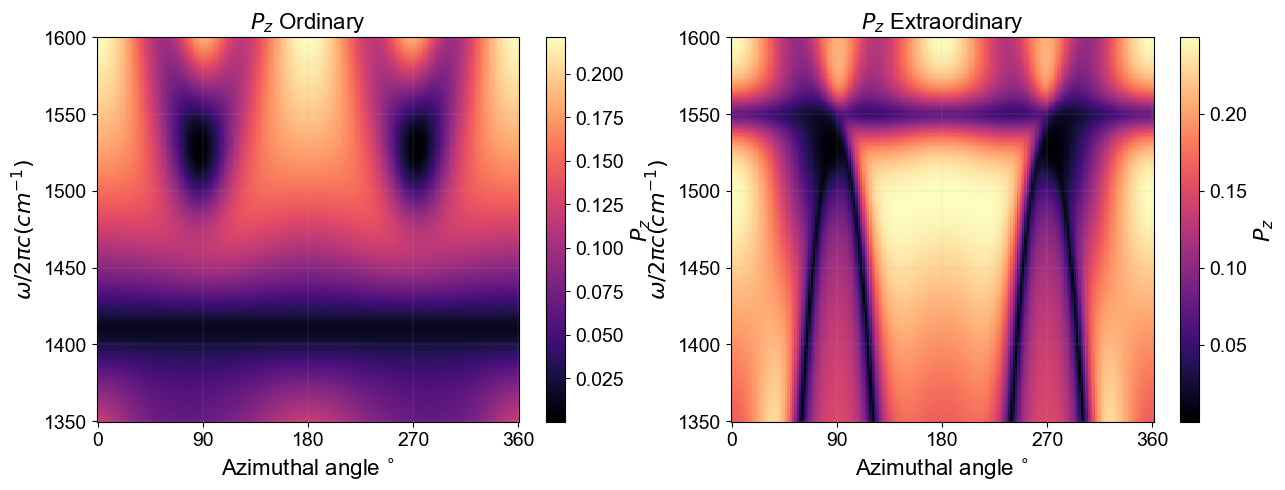

In [577]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ Ordinary')
axs[1].set_title(f'$P_z$ Extraordinary')


plt.show()

# Dispersion

In [682]:
eps_prism = 11.5
payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 1527,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Calcite",
        "rotationX": 0,
        "rotationY": 66.7,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [683]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
layer.profile = layer.profile['transmitted']

In [684]:
from matplotlib import colors

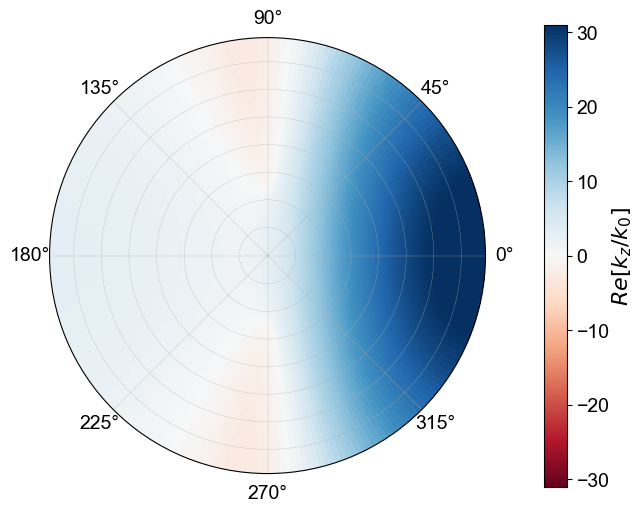

In [707]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)
# Convert to Cartesian coordinates for plotting
x_axis = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
y_axis = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

### Plotting for Paper
fig, axs = plt.subplots(figsize = (7.5,7.5), subplot_kw= dict(projection = 'polar')
  )
im1 = axs.pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu', norm = colors.TwoSlopeNorm(vmin=-31, vcenter=0, vmax =31))
cbar1 = plt.colorbar(im1, ax=axs, shrink=0.8, pad = 0.1)
cbar1.set_label(r'$Re[k_z/k_0]$', labelpad=1)
axs.grid(linewidth=0.2)
axs.set_yticklabels([])
plt.show()

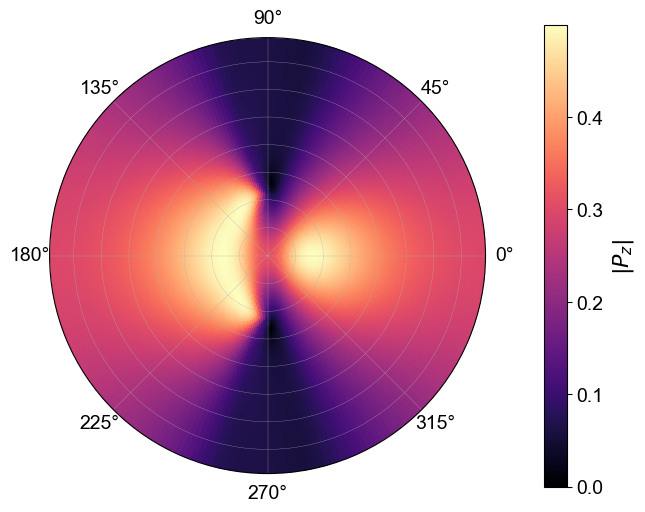

In [713]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)
# Convert to Cartesian coordinates for plotting
x_axis = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
y_axis = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

### Plotting for Paper
fig, axs = plt.subplots(figsize = (7.5,7.5), subplot_kw= dict(projection = 'polar')
  )
im1 = axs.pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Pz'][:,:,1])**2.), cmap='magma', vmin=0)
cbar1 = plt.colorbar(im1, ax=axs, shrink=0.8, pad = 0.1)
cbar1.set_label(r'$|P_z|$', labelpad=5)
axs.grid(linewidth=0.2)
axs.set_yticklabels([])
plt.show()

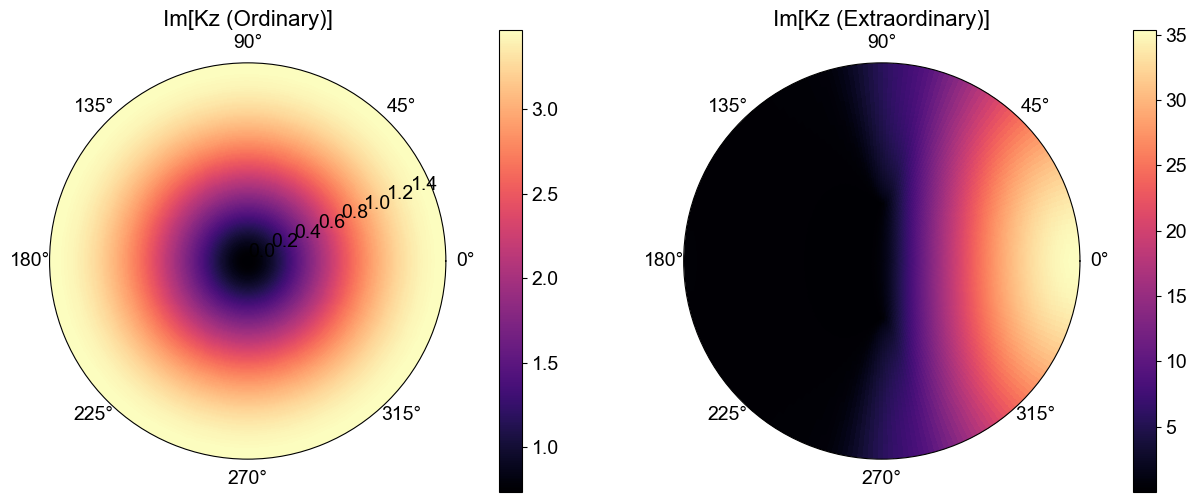

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.73530288, 0.92575088])>

In [689]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.)
axs[1].grid(linewidth=0.)
axs[1].set_yticklabels([])
axs[0].set_title('Im[Kz (Ordinary)]')
axs[1].set_title('Im[Kz (Extraordinary)]')
plt.show()

tf.math.imag(layer.profile['propagation'][0,80])

Text(0.5, 1.0, 'Re[Kz (Extraordinary)]')

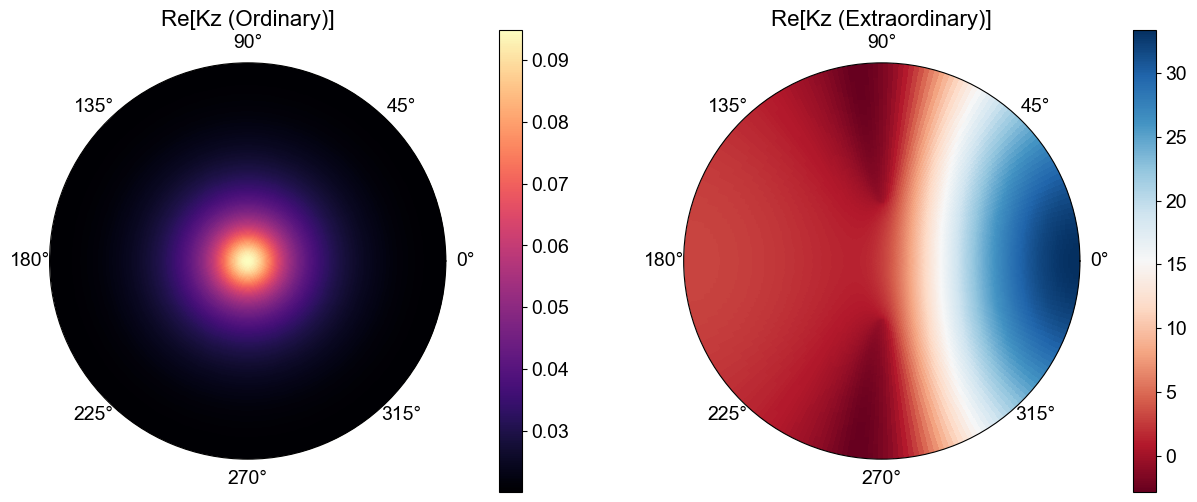

In [690]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.)
axs[1].grid(linewidth=0.)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Re[Kz (Ordinary)]')
axs[1].set_title('Re[Kz (Extraordinary)]')

tf.Tensor(6.452986314076571e-15, shape=(), dtype=float64)
tf.Tensor(0.10662713612478295, shape=(), dtype=float64)


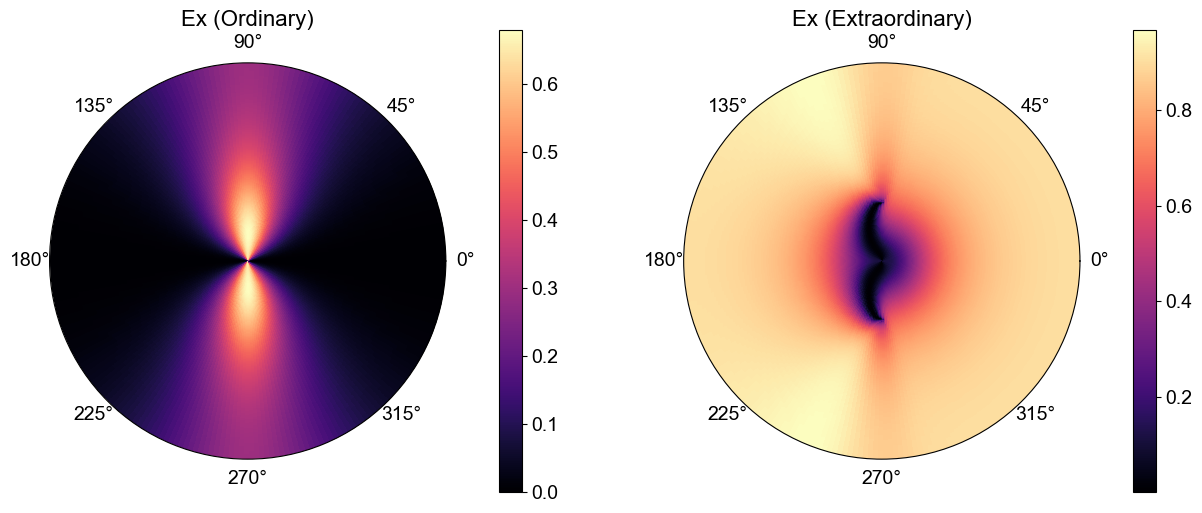

In [691]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.)
axs[1].grid(linewidth=0.)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Ex (Ordinary)')
axs[1].set_title('Ex (Extraordinary)')

print(tf.math.abs(layer.profile['Ex'][0,0,0])**2.)
print(tf.math.abs(layer.profile['Ex'][0,0,1])**2.)
plt.show()

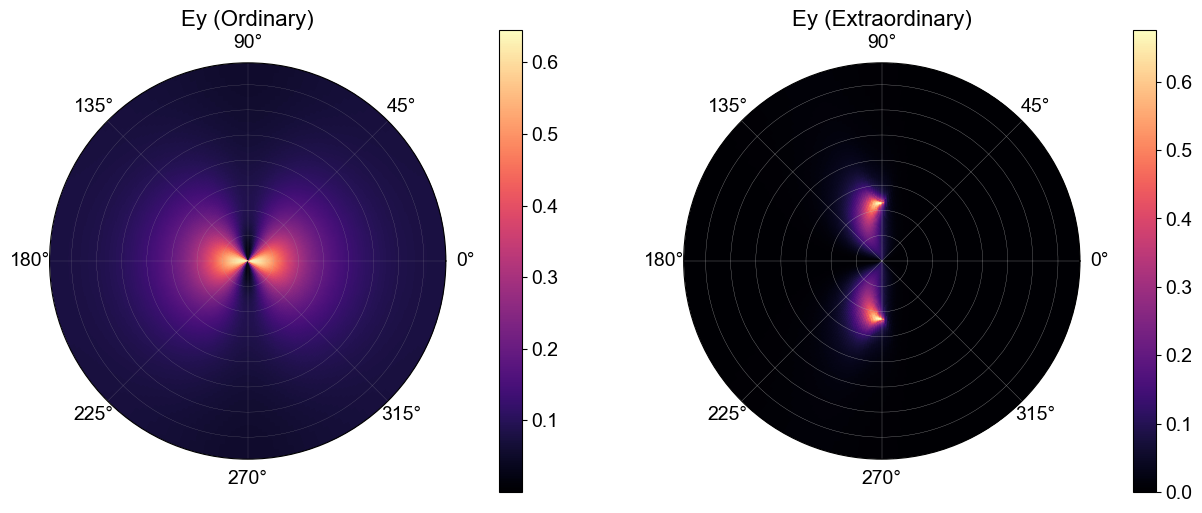

In [692]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Ey (Ordinary)')
axs[1].set_title('Ey (Extraordinary)')
plt.show()

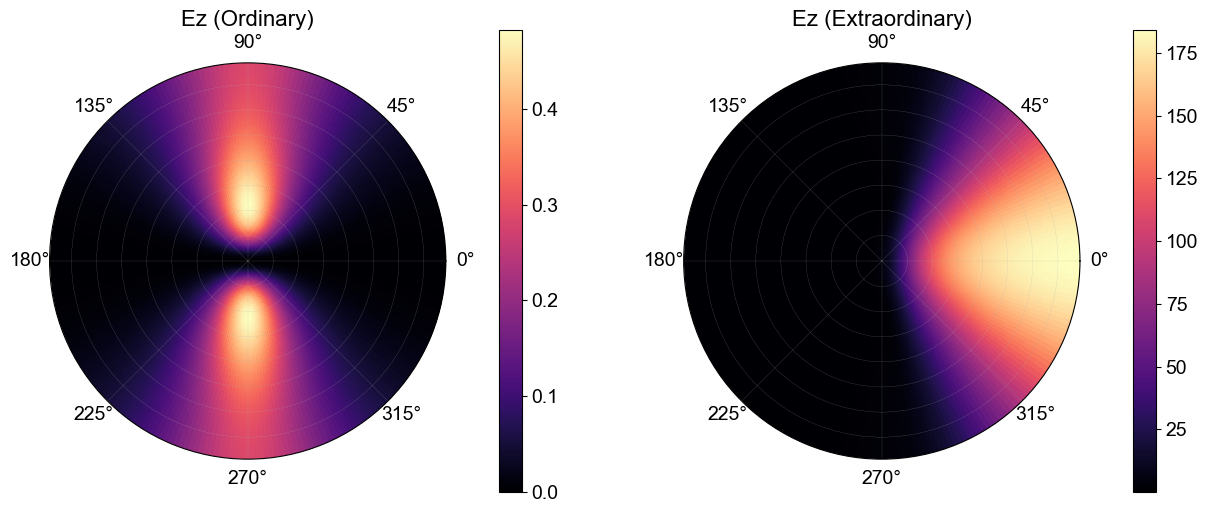

In [693]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Ez (Ordinary)')
axs[1].set_title('Ez (Extraordinary)')
plt.show()

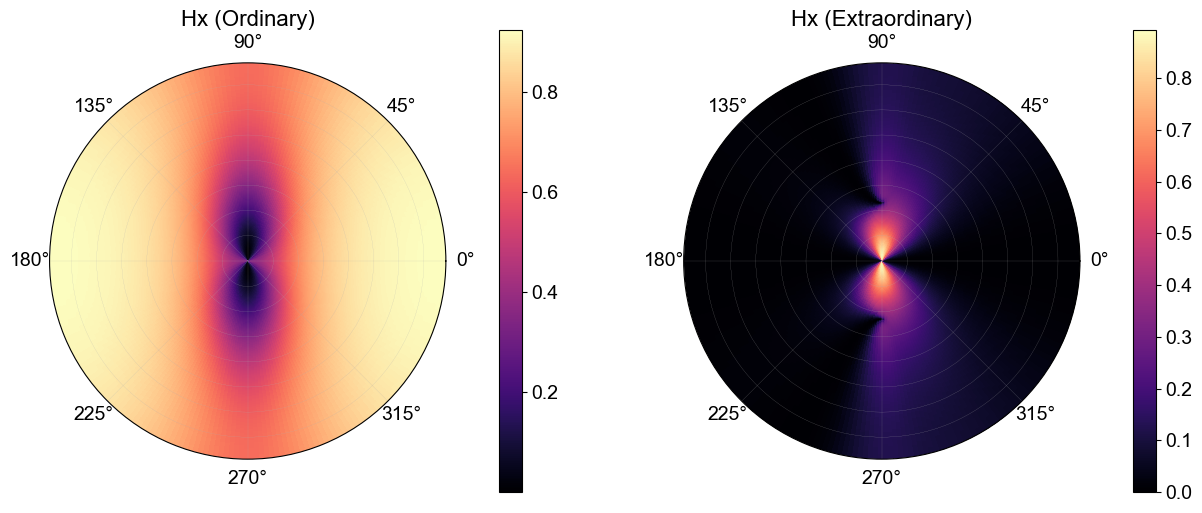

In [694]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Hx (Ordinary)')
axs[1].set_title('Hx (Extraordinary)')
plt.show()

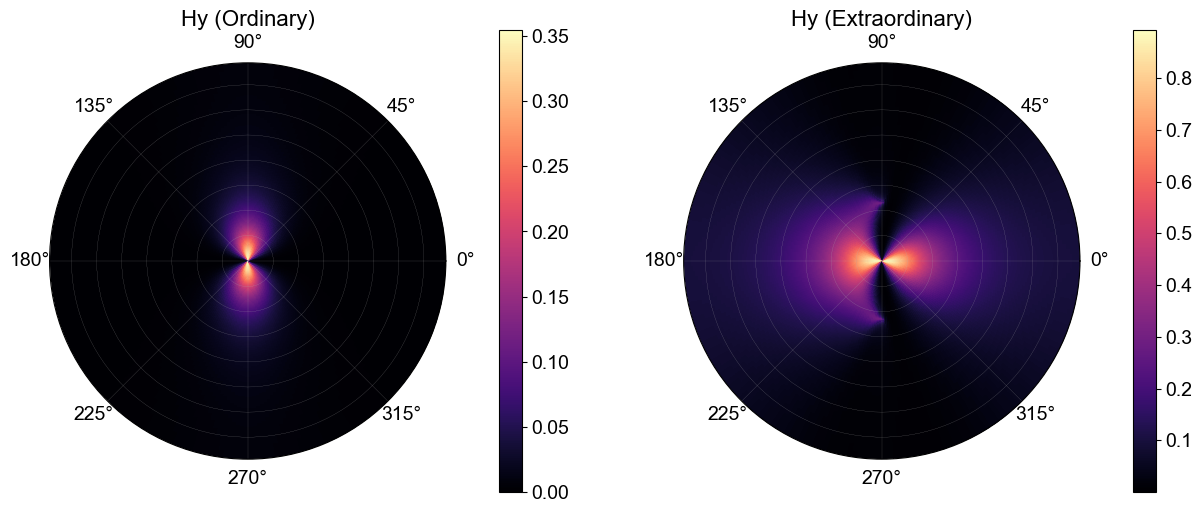

In [695]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Hy (Ordinary)')
axs[1].set_title('Hy (Extraordinary)')
plt.show()

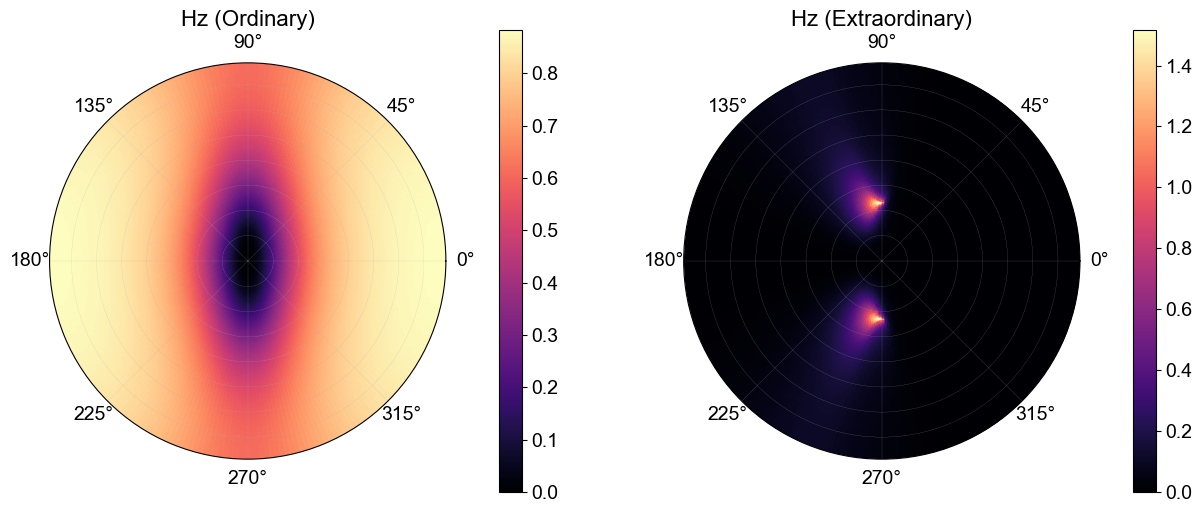

In [696]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Hz (Ordinary)')
axs[1].set_title('Hz (Extraordinary)')
plt.show()

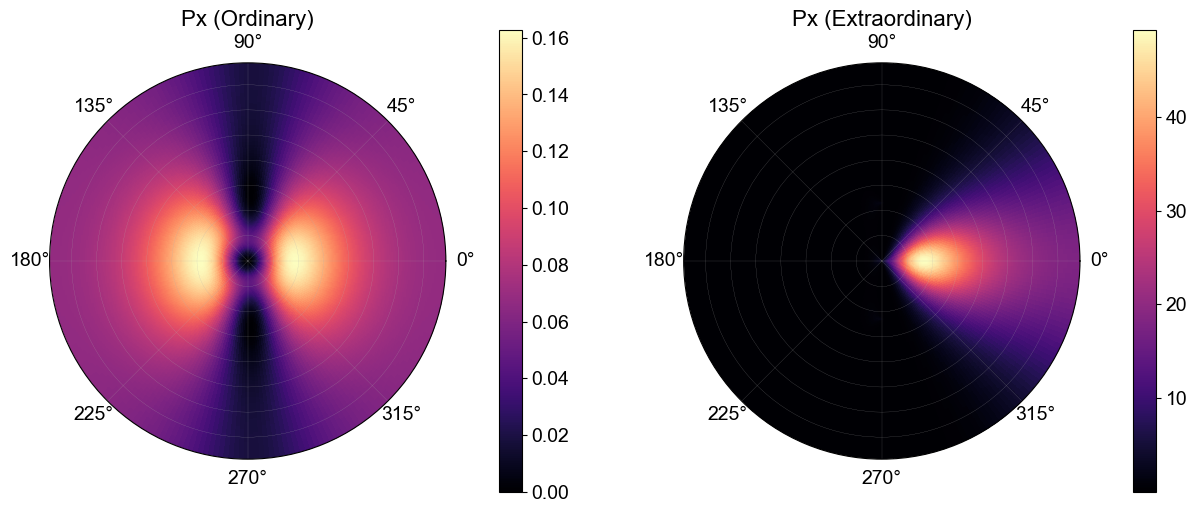

In [697]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Px (Ordinary)')
axs[1].set_title('Px (Extraordinary)')
plt.show()

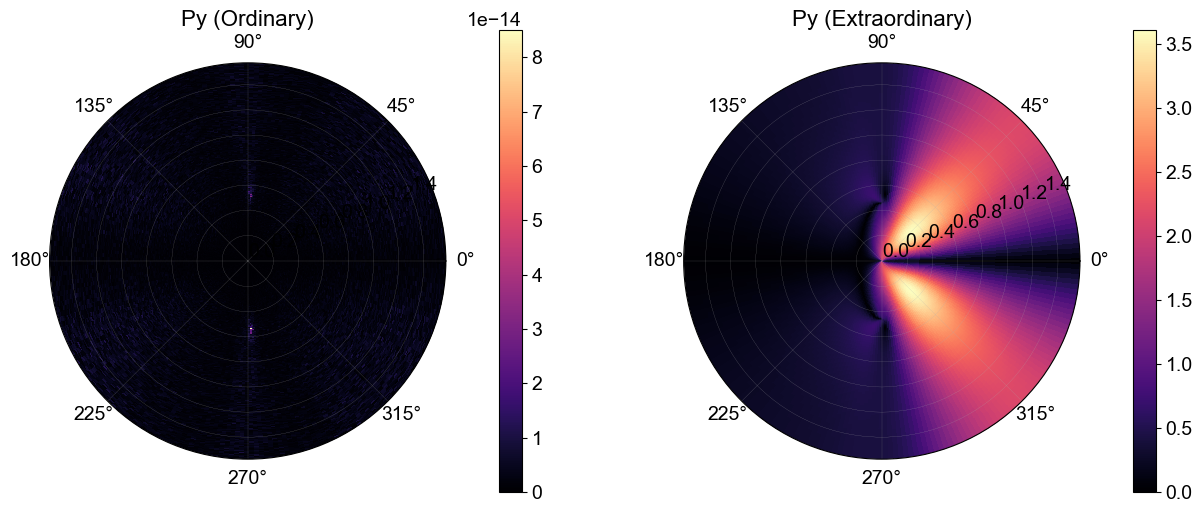

In [714]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Py'][:,:,0])**2.), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Py'][:,:,1])**2.), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_title('Py (Ordinary)')
axs[1].set_title('Py (Extraordinary)')
plt.show()

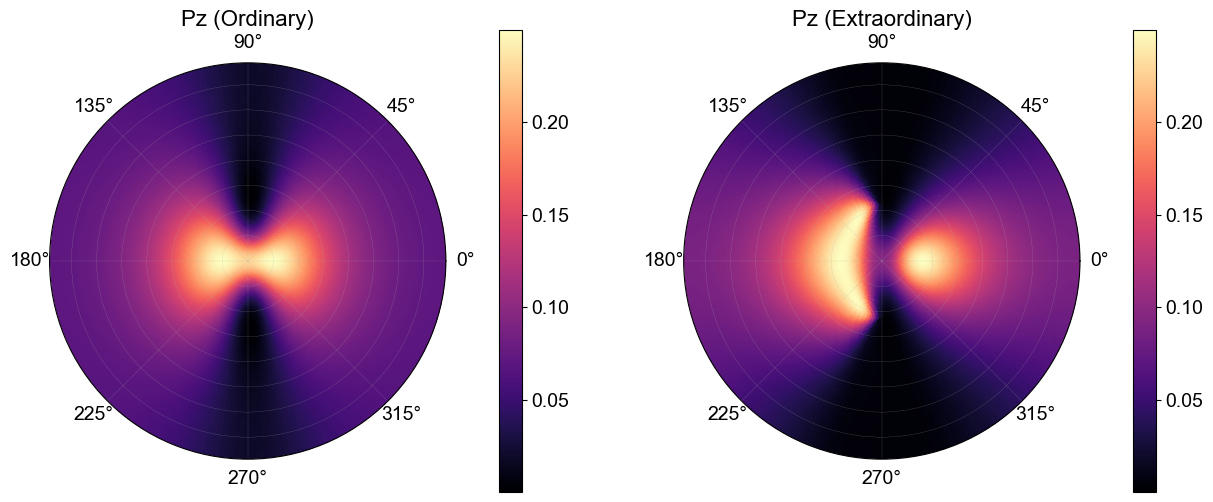

In [699]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Pz (Ordinary)')
axs[1].set_title('Pz (Extraordinary)')
plt.show()

In [700]:
overall_ext = tf.sqrt(tf.math.abs(layer.profile['Pz'][:,:,1])**2. + tf.math.abs(layer.profile['Px'][:,:,1])**2. + tf.math.abs(layer.profile['Py'][:,:,1])**2.)
overall_ord = tf.sqrt(tf.math.abs(layer.profile['Pz'][:,:,0])**2. + tf.math.abs(layer.profile['Px'][:,:,0])**2. + tf.math.abs(layer.profile['Py'][:,:,0])**2.)

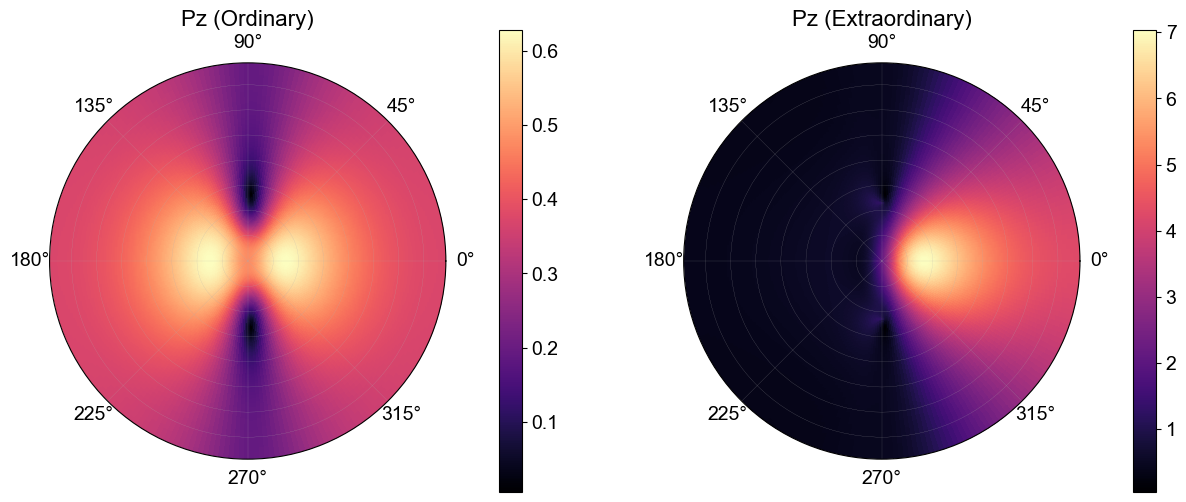

In [701]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), overall_ord, cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), overall_ext, cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Pz (Ordinary)')
axs[1].set_title('Pz (Extraordinary)')
plt.show()

# Hyperbolic Dispersion Curves

In [738]:
eps_prism = 700.

payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 1530
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Calcite",
        "rotationX": 0,
        "rotationY": 66.7,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [739]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
transmitted = layer.profile['transmitted']['propagation']
reflected = layer.profile['reflected']['propagation']

In [740]:
%matplotlib widget
import matplotlib.pyplot as plt

Text(0.5, 0, '$Re[k_z/k_0]$')

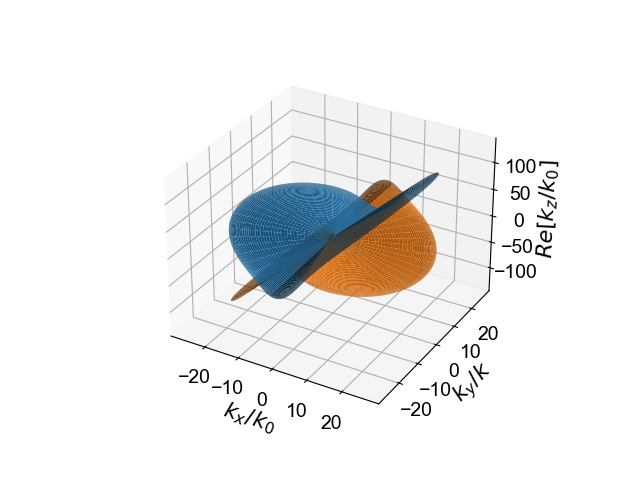

In [741]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.real(transmitted[:,:,1])
Z_reflected = tf.math.real(reflected[:,:,1])

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k$')
ax.set_zlabel(r'$Re[k_z/k_0]$')


Text(0.5, 0, '$Imag[k_z/k_0]$')

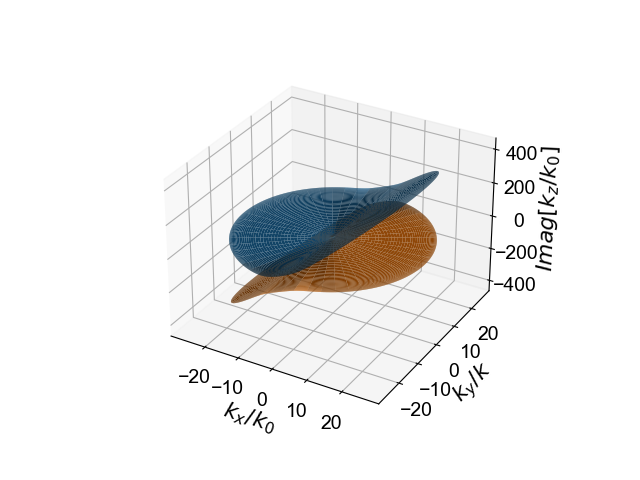

In [742]:
# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.imag(transmitted[:,:,1])
Z_reflected = tf.math.imag(reflected[:,:,1])

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k$')
ax.set_zlabel(r'$Imag[k_z/k_0]$')
